In [1]:
#from __future__ import annotations
#from tkinter import N

from CARTplus import *

import pandas as pd

#d = dict(features, **n_features)  #merges the two dicts
#df = pd.DataFrame(data=d)         #creates the dataframe

#print(df)
#import csv



In [2]:
import numpy as np
train = np.genfromtxt("Carseats_train.csv", delimiter=',', names=True, dtype=(float,float,float,float, float, float, object, float, float, object, object))



#c = numpy.loadtxt("Carseats_train.csv")
print(type(train))
print(train.dtype)

features_names = train.dtype.names

n_features = train[["ShelveLoc", "US","Urban"]]
n_features_names = n_features.dtype.names
n_features_names

y = train["Price"]

features = train[["Sales", "CompPrice", "Income", "Advertising", "Population", "Age", "Education"]]
features_names = features.dtype.names


indici = np.arange(0, len(y))


<class 'numpy.ndarray'>
[('Sales', '<f8'), ('CompPrice', '<f8'), ('Income', '<f8'), ('Advertising', '<f8'), ('Population', '<f8'), ('Price', '<f8'), ('ShelveLoc', 'O'), ('Age', '<f8'), ('Education', '<f8'), ('Urban', 'O'), ('US', 'O')]


.to_records()

train = pd.read_csv("Carseats_train.csv")
train = train.to_records()

In [3]:
import numpy as np
test = np.genfromtxt("Carseats_test.csv", delimiter=',', names=True, dtype=(float,float,float,float, float, float, object, float, float, object, object))


n_features_test = test[["ShelveLoc", "US","Urban"]]


y_test = test["Price"]

features_test = test[["Sales", "CompPrice", "Income", "Advertising", "Population", "Age", "Education"]]


In [4]:
#when definining a funcion please be aware we are using purity gain or information gain or greatest difference between variance, all positive aspects 
#adding user_defined as a possible impurity_fn and added user_impur to carry that function 
def user_fn(self, node): #impur just takes node in CART
    
    return (mean(self.y[node.indexes])**2)*len(self.y[node.indexes])


In [5]:
comp = list(features["CompPrice"][0:20])
comp.sort()


In [6]:
node1 = MyNodeClass('n1', indici) 
cart = CART(y,features,features_names,n_features,n_features_names, impurity_fn = "between_variance", problem="regression", method = "CART",  min_cases_parent= 10,min_cases_child= 5, max_level = 10, twoing = False, min_imp_gain = 0.01)

In [7]:
comp = cart.midway_points("CompPrice", node1)

In [8]:
cart.growing_tree(node1, max_k = 1)

Split Found:  n1 [['CompPrice', 127.5, 3784538.433668131, 0]] start
node_proportion_total  0.20228188075035564
Split Found:  n2 [['Sales', 7.55, 1861259.102354933, 1]] left
node_proportion_total  0.3046767681766827
Node_proportion_gain  0.10239488742632707
Split Found:  n4 [['Age', 53.5, 1196245.7735961769, 2]] left
node_proportion_total  0.3348077638461362
Node_proportion_gain  0.030130995669453486
Split Found:  n8 [['Income', 67.0, 435776.8626373626, 3]] left
node_proportion_total  0.34974725911965104
Node_proportion_gain  0.014939495273514847
Split Found:  n16 [['Age', 40.5, 179045.45238095237, 4]] left
node_proportion_total  0.35524068739400466
Node_proportion_gain  0.005493428274353618
This split isn't good now i cut it [reg delta]
Split Found:  n17 [['ShelveLoc', (b'Bad', b'Good'), 258182.24444444443, 4]] right
node_proportion_total  0.35907577327169
Node_proportion_gain  0.003835085877685329
This split isn't good now i cut it [reg delta]
Split Found:  n9 [['Sales', 2.755, 764884

((((None, None), (None, None)), (None, ((None, None), None))),
 ((None, None), ((None, None), None)))

In [9]:
#print(cart.impurity_fn, cart.impur(node1))
#
#for i in cart.get_all_node():
#    a =1
#    #print(i.name, cart.impur(i))

In [10]:
n_dict = cart.identify_subtrees(cart.get_all_node(), cart.get_leaf() )

#for i in n_dict:
#    print(i.name)
#    for a, nestedlist in enumerate(n_dict[i]):
#        for child in nestedlist:
#            print(a, child.name)
#



In [11]:
#cart.alpha_calculator(n_dict)

In [12]:
#dir(cart)

In [13]:
#cart._CART__node_search_split(node1, max_k = 1, combination_split = False, max_c = 1)

In [14]:
#all_nodes, leaves = cart.cut_tree(20)
#
#print(len(all_nodes), len(leaves))

In [15]:
#len(cart.get_leaf())

In [16]:
#cart.print_tree(all_node = all_nodes, leaf = leaves, filename = "a.png",table = False, html = False)

In [17]:
from statistics import variance, mean, pvariance

In [18]:
val = []
meann = mean(cart.y)
for i in cart.y:
    val.append((i - meann)**2)

sum(val) / len(val) * len(val)



155526.82499999992

In [19]:
pvariance(cart.y)*len(y)

155526.82499999998

In [20]:
variance(cart.y)*len(y)

156084.2688172043

In [21]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 


cart.print_tree(table = True, html = False)#.style.hide_index() #print both the pruned and non pruned tree 
#cart.print_tree(table = False, html = False, visual_pruning = True)

,Node,Node Type,Variable Split,n,Impurity Value,Deviance,Explained Deviance,Class/Value
0,n1,Parent,CompPrice>127.5,280,3753078.18,155526.82,0.202,115.78
1,n2,Parent,Sales>7.55,162,1845333.95,75946.05,0.305,106.73
2,n4,Parent,Age>53.5,89,1191559.6,24566.40,0.335,115.71
3,n8,Parent,Income>67.0,27,433453.37,6691.63,0.35,126.7
4,n16,Child,None,13,178191.08,2462.92,None,117.08
5,n17,Child,None,14,257585.79,1905.21,None,135.64
6,n9,Parent,Sales>2.755,62,762792.4,13188.60,0.373,110.92
7,n18,Child,None,6,99330.67,999.33,None,128.67
8,n19,Child,None,56,665554.02,10096.98,None,109.02
9,n5,Parent,CompPrice>99.0,73,669699.51,35454.49,0.438,95.78


In [22]:
cart.print_tree(table = False, html = False, visual_pruning = True)

{leaves : mean square error} =  {13: 378.26637414114776, 12: 374.05693484073623, 11: 372.07315027022867, 10: 379.327126170639, 8: 401.6294163011941, 7: 377.1002335519621, 6: 365.12339845930427, 5: 377.2486577185635, 4: 403.28132587388114, 3: 440.0370731606482, 2: 458.509441351924}
Best tree for test set has 6 leaves with a deviance of: 365.12339845930427 


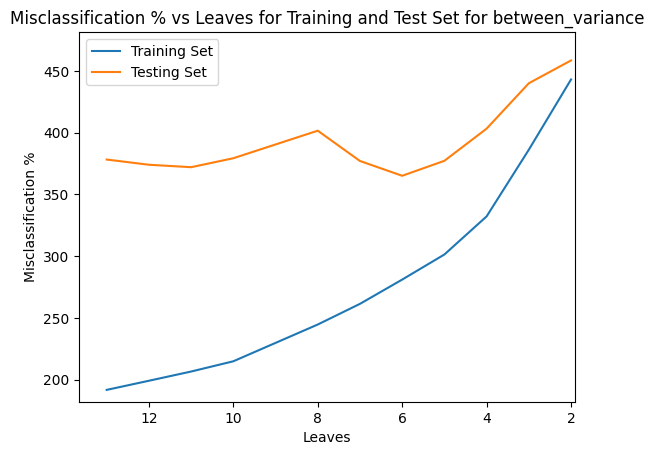

,Node,Node Type,Variable Split,n,Impurity Value,Deviance,Explained Deviance,Class/Value
0,n1,Parent,CompPrice>127.5,280,3753078.18,155526.82,0.202,115.78
1,n2,Parent,Sales>7.55,162,1845333.95,75946.05,0.305,106.73
2,n4,Child,None,89,1191559.6,24566.40,None,115.71
3,n5,Parent,CompPrice>99.0,73,669699.51,35454.49,0.438,95.78
4,n10,Child,None,9,40133.44,4103.56,None,66.78
5,n11,Child,None,64,638201.27,22715.73,None,99.86
6,n3,Parent,Sales>7.555,118,1939204.48,48120.52,0.611,128.19
7,n6,Child,None,58,1132044.98,17604.02,None,139.71
8,n7,Parent,CompPrice>146.5,60,822276.27,15399.73,0.698,117.07
9,n14,Child,None,45,558893.89,8877.11,None,111.44


In [23]:
alpha, pruned_table = cart.pruning(features_test, n_features_test, y_test, table = True)
pruned_table#.style#.hide_index()

In [24]:
print(len(cart.get_leaf()), len(cart.get_all_node()))

13 25


In [ ]:
cart.deviance_cat2

In [25]:
cart.cut_tree(5)

([<CARTplus.MyNodeClass at 0x1c48f4fda90>,
  <CARTplus.MyNodeClass at 0x1c48fc37cd0>])

In [26]:
cart.print_alpha(alpha)


('Alpha = 0', 'value soglia = None', 'deviance = 191.77460919784585', 'leaves = 13')
('Alpha = 2067.2222222222235', "value soglia = ['Sales', 11.879999999999999, 3]", 'deviance = 199.15754570578238', 'leaves = 12')
('Alpha = 2092.2812980030776', "value soglia = ['Sales', 2.755, 3]", 'deviance = 206.6299789129364', 'leaves = 11')
('Alpha = 2323.492266992266', "value soglia = ['Income', 67.0, 3]", 'deviance = 214.9281655807659', 'leaves = 10')
('Alpha = 4167.344350961538', "value soglia = ['Sales', 10.629999999999999, 3]", 'deviance = 244.69491094477667', 'leaves = 8')
('Alpha = 4686.178090558838', "value soglia = ['Age', 53.5, 2]", 'deviance = 261.431261268201', 'leaves = 7')
('Alpha = 5499.0029556650225', "value soglia = ['CompPrice', 135.5, 2]", 'deviance = 281.0705575384331', 'leaves = 6')
('Alpha = 5689.688888888888', "value soglia = ['CompPrice', 146.5, 2]", 'deviance = 301.3908749987506', 'leaves = 5')
('Alpha = 8635.203220129362', "value soglia = ['CompPrice', 99.0, 2]", 'devianc

In [27]:
#all_node = cart.get_all_node()
#leaf = cart.get_leaf()
#      
#leaf_list =[]
#leaf_dict ={}
#for node in leaf:                           #creates a list of the node numbers and a dictionary connecting nodes with their node numbers
#    leaf_list.append(int(node.name[1:]))
#    leaf_dict[node] = int(node.name[1:])
#father_list =[]
#father_dict = {}
#for node in all_node:
#    father_list.append(int(node.name[1:]))
#    father_dict[node] = int(node.name[1:])
#
#parent_child =[]                            #list for having child with their parent, for use in dictionary below
#for node in all_node:
#    if (int(node.name[1:]) *2) in father_list:
#    
#        parent_child.append([int(node.name[1:]), int(node.name[1:])*2])
#    if (int(node.name[1:])*2+1) in father_list:
#    
#        parent_child.append([int(node.name[1:]), int(node.name[1:])*2+1])  
#parent_children = {}                        #dictionary for parents with children, only numbers
#for parent, child in parent_child: 
#    if parent in parent_children:
#        parent_children[parent].append(child)
#    else:
#        parent_children[parent] = [child]
#
##igraph Graph
#        
#nr_vertices = max(father_list)                            # make too many to allow for missing nodes
#v_label = list(map(str, father_list) )                      # create node labels 
#G = Graph.Tree(nr_vertices, 2)                              # 2 stands for children number
#lay = G.layout_reingold_tilford(root=[0])
#position = {k: lay[k-1] for k in father_list}               # assigning nodes to positions , using reigngold layou
#

In [28]:
#node_prop_dict = {}
#for i in range(len(father_list)):
#    if get_key(father_dict, father_list[i]).node_prop:
#        node_prop_dict[father_list[i]] = get_key(father_dict, father_list[i]).node_prop

In [29]:
#node_prop_gain = {}
#node_prop_gain[1] = node_prop_dict[1]
#for i in range(len(node_prop_dict)):
#    if i!= 0:
#        node_prop_gain[list(node_prop_dict.keys())[i]] = node_prop_dict[list(node_prop_dict.keys())[i]] - node_prop_dict[list(node_prop_dict.keys())[i-1]]

In [30]:
#nr_vertices = max(father_list)                            # make too many to allow for missing nodes
#v_label = list(map(str, father_list) )                      # create node labels 
#G = Graph.Tree(nr_vertices, 2)                              # 2 stands for children number
#lay = G.layout_reingold_tilford(root=[0])
#position = {k: lay[k-1] for k in father_list}               # assigning nodes to positions , using reigngold layou
#
#new_dict = cart.identify_subtrees(cart.get_all_node(), cart.get_leaf())
#    
#for i in sorted(position.keys()):
#    if i*2 in position: #left nodes
#        diff = position[i*2][1] - position[i*2][1]*node_prop_gain[i] #calculates change in position for correction in downward nodes
#        position[i*2] = [position[i*2][0], position[i*2][1]*node_prop_gain[i]] #manipulates the y coordinate based on the proportion gain
#        
#        #this is to correct for all downward nodes 
#        unique_nodes = []
#        for fathers in new_dict:
#            if i*2 == int(fathers.name[1:]):
#                for nestedlist in new_dict[fathers]:
#                    for childs in nestedlist:
#                        if childs.name not in unique_nodes:
#                            unique_nodes.append(childs.name)
#                            position[int(childs.name[1:])] = [position[int(childs.name[1:])][0], position[int(childs.name[1:])][1] - diff]
#
#
#    if i*2+1 in position:  #right nodes
#        position[i*2+1] = [position[i*2+1][0], position[i*2+1][1]*node_prop_gain[i]]
#        
#        #this is to correct for all downward nodes
#        unique_nodes = []
#        for fathers in new_dict:
#            if i*2+1 == int(fathers.name[1:]):
#                for nestedlist in new_dict[fathers]:
#                    for childs in nestedlist:
#                        if childs.name not in unique_nodes:
#                            unique_nodes.append(childs.name)
#                            position[int(childs.name[1:])] = [position[int(childs.name[1:])][0], position[int(childs.name[1:])][1] - diff]
#
#position[1] = [0 , 2*position[2][1]]
#

In [31]:
#Y = [lay[k][1] for k in range(len(father_list))] # levels of the tree
#M = max(Y)
#es = EdgeSeq(G)                                             # sequence of edges
#E = [e.tuple for e in G.es] # list of edges, connects nodes
##L = len(position)
#Xn = [position[k][0] for k in father_list]
#Yn = [position[k][1] for k in father_list]
#a = 0
#while a<20:                                                 # When the value is removed it skips to the next index value, jumping, a<10 is just overkill, increased to 20, for really narrow branches
#    for edge in E:   #this is meant to catch the mismateched E's 
#        if edge[0] +1 not in position or edge[1]+1 not in position:
#            E.remove(edge) 
#    a+=1
#Xe = []
#Ye = []
#
#for edge in E: 
#    Xe+=[position[edge[0]+1][0],position[edge[1]+1][0], None]                   # edited for +1 poisiotn as the expected 0 root node it 1 in our dictionary, if index error, increase a 
#    Ye+=[position[edge[0]+1][1],position[edge[1]+1][1], None]         
#

In [32]:
#upward facing tree
#pos = Ye[1]*2
#Ye[0] = pos
#Ye[3] = pos
#Yn[24]  =pos

In [33]:
#for label in range(len(v_label)):
#    for node in all_node:
#        if v_label[label] == node.name[1:]:
#            if int(v_label[label]) in leaf_list:
#                if cart.problem == "classifier":        #For classifier problem
#                    response_dict ={}
#                    for response in cart.y[node.indexes]:        #determing majority in terminal nodes
#                        
#                        if response in response_dict:
#                            response_dict[response] +=1
#                        else:
#                            response_dict[response] =1
#                    
#                    if cart.method == "LATENT-BUDGET-TREE" or cart.twoing: #multiclass methods
#                        total_node_obs = sum(response_dict.values())
#                        for key in response_dict:
#                            response_dict[key] = round(response_dict[key] / total_node_obs,2)
#                        class_node = response_dict
#                        myKeys = list(class_node.keys())
#                        myKeys.sort()
#                        class_node = {i: class_node[i] for i in myKeys}
#                    else:
#                        class_node = max(response_dict, key = response_dict.get)
#                    
#                    if cart.impurity_fn == "gini":
#                        v_label[label] = f"{node.name}, Class: {class_node}, {cart.impurity_fn} : {round(cart.impur(node, display = True),2)}, Samples : {len(node.indexes)}" 
#                    elif cart.impurity_fn == "tau":
#                        v_label[label] = f"{node.name}, Class: {class_node}, {cart.impurity_fn} : None, Samples : {len(node.indexes)}" 
#                    else:
#                        v_label[label] = f"{node.name}, Class: {class_node}, {cart.impurity_fn} : {round(cart.impur(node),2)}, Samples : {len(node.indexes)}"
#                else:
#                    mean_y = mean(cart.y[node.indexes])
#                    v_label[label]=  f"{node.name}, {node.split}, Bin Value: {round(mean_y,2)}, {cart.impurity_fn} : {round(cart.impur(node),2)}, Samples : {len(node.indexes)}"
#            
#            #label for non leaves
#            else:
#                if cart.problem == "classifier":
#                    response_dict ={}
#                    for response in cart.y[node.indexes]:        #determing majority in terminal nodes
#                        if response in response_dict:
#                            response_dict[response] +=1
#                        else:
#                            response_dict[response] =1
#                    
#                    if cart.method == "LATENT-BUDGET-TREE" or cart.twoing: #multiclass methods
#                        total_node_obs = sum(response_dict.values())
#                        for key in response_dict:
#                            response_dict[key] = round(response_dict[key] / total_node_obs,2)
#                        class_node = response_dict
#                        myKeys = list(class_node.keys())
#                        myKeys.sort()
#                        class_node = {i: class_node[i] for i in myKeys}
#                    else:
#                        class_node = max(response_dict, key = response_dict.get)
#                    if cart.impurity_fn == "gini":
#                        v_label[label] = f"{node.name}, {node.split}, Class:{class_node}, {cart.impurity_fn} : {round(cart.impur(node, display = True),2)}, Samples: {len(node.indexes)}"
#                    elif cart.impurity_fn == "tau":
#                        v_label[label] = f"{node.name}, {node.split}, Class:{class_node}, {cart.impurity_fn} : {round(node.value_soglia_split[0][2],2)}, Samples: {len(node.indexes)}" 
#                    else:
#                        v_label[label] = f"{node.name}, {node.split}, Class:{class_node}, {cart.impurity_fn} : {round(cart.impur(node),2)}, Samples: {len(node.indexes)}"
#                else:
#                    mean_y = mean(cart.y[node.indexes])
#                    v_label[label]=  f"{node.name}, {node.split}, Bin Value: {round(mean_y,2)}, {cart.impurity_fn} : {round(cart.impur(node),2)}, Samples : {len(node.indexes)}"
#labels = v_label
## Drawing using plotly library
#fig = go.Figure()
#fig.add_trace(go.Scatter(x=Xe,
#                y=Ye,
#                mode='lines',
#                line=dict(color='rgb(210,210,210)', width=1),
#                hoverinfo='none'
#                ))
#fig.add_trace(go.Scatter(x=Xn,
#                y=Yn,
#                mode='markers',
#                name='Nodes',
#                marker=dict(symbol='circle-dot',
#                                size=18,
#                                color='#6175c1',    #'#DB4551',
#                                line=dict(color='rgb(50,50,50)', width=1)
#                                ),
#                text=labels,
#                hoverinfo='text',
#                opacity=0.8
#                ))
#filename="CART_tree.png"
#fig.update_layout(
#    title=filename[:-4],    #chops off ".png"
#    )
#fig.show()
#

full dataset model 

In [34]:
df=pd.read_csv('Carseats.csv')
df=df.iloc[:,1:]

df.head()

features = df[features_names]
features.head()

n_features = df[n_features_names]
n_features.head()

y = df["Price"]
y.head()

indici = np.arange(0, len(y))


KeyError: ('Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Age', 'Education')

In [ ]:
my_tree = MyNodeClass('n1', indici) 

cart = CART(y,features,features_names,n_features,n_features_names, impurity_fn = "between_variance", problem="regression", method = "CART",  min_cases_parent= 10,min_cases_child= 5, max_level = 4)

#cart.growing_tree(my_tree)


need to somehow get only 29 leaves in final tree?
can't prune the traditional way as only have training set 

In [ ]:
#cart.print_tree(table = True, html = True).style.hide_index() #print both the pruned and non pruned tree 

